#### Roshnaey Khattak
DASC 8211 Term Project

#### Step One - Data Acquisition
I will begin this analysis by importing and calling any necessary libraries. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Next, I will load the data and view the dimensions. 
The data was obtained through a Kaggle search for information on life expectancy and immunization information. 
The data can be found [here](https://www.kaggle.com/kumarajarshi/life-expectancy-who).

In [3]:
filepath = "/Users/roshnaey/Desktop/Life Expectancy Data.csv"
df = pd.read_csv(filepath)
df.columns = ["country", "year", "status", "lifeExpectancy", 
              "adultMortality", "infantDeaths", "alcohol", 
              "percentageExpenditure", "hepatitisB", "measles", "BMI", 
              "underFiveDeaths", "polio", "totalExpenditure", 
              "diphtheria", "HIV_AIDS", "GDP", "population", 
              "thinness_10_19", "thinness_5-9", 
              "incomeCompositionOfResources", "schooling"]

#### Step Two - Exploratory Data Analysis

Next, I will report general information on the data. This includes:
- the number of rows and columns in the dataframe
- the first few observations of the dataset using the data.head() function
- descriptive/summary statistics for the variables.

In [4]:
dfrows = len(df.axes[0])
dfcols = len(df.axes[1])
print("Number of rows: " + str(dfrows))
print("Number of columns: " + str(dfcols))

Number of rows: 2938
Number of columns: 22


In [5]:
df.head()

,country,year,status,lifeExpectancy,adultMortality,infantDeaths,alcohol,percentageExpenditure,hepatitisB,measles,...,polio,totalExpenditure,diphtheria,HIV_AIDS,GDP,population,thinness_10_19,thinness_5-9,incomeCompositionOfResources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [6]:
summaryStatistics = df.describe()
print (summaryStatistics)

              year  lifeExpectancy  adultMortality  infantDeaths      alcohol  \
count  2938.000000     2928.000000     2928.000000   2938.000000  2744.000000   
mean   2007.518720       69.224932      164.796448     30.303948     4.602861   
std       4.613841        9.523867      124.292079    117.926501     4.052413   
min    2000.000000       36.300000        1.000000      0.000000     0.010000   
25%    2004.000000       63.100000       74.000000      0.000000     0.877500   
50%    2008.000000       72.100000      144.000000      3.000000     3.755000   
75%    2012.000000       75.700000      228.000000     22.000000     7.702500   
max    2015.000000       89.000000      723.000000   1800.000000    17.870000   

       percentageExpenditure   hepatitisB        measles          BMI  \
count            2938.000000  2385.000000    2938.000000  2904.000000   
mean              738.251295    80.940461    2419.592240    38.321247   
std              1987.914858    25.070016   11467.2

In this dataset, there are a few variables that I am unsure of the meaning of. These include:
- Adult Mortality
    - I am not entirely sure what exactly the variable represents, the range is too high to be a mortality rate as a probability (the majority of the values are above 100), but the numbers are also too low to represent number of deaths. 
- Infant Deaths
    - The same issue is seen with the infant deaths variable. 
- BMI
    - The general BMI range is smaller than what is represented in the dataset. Most scales go up to 40, but the maximum value for this datset is over 80. 
- Thinness variables
    - I am generally unsure of what these varaibles mean.
- Schooling
    - As with a few of the previously mentioned variables, the scale for this variable is confusing.

To determine what each variable could mean, I returned to the original data's author on Kaggle. Thankfully, they included extensive details on not only the data as a whole, but also each individual variable. The information is available on the [original Kaggle page](https://www.kaggle.com/kumarajarshi/life-expectancy-who). For my own reference, I will include a short description below.

- **Country**: country
- **Year**: year
- **Status**: developed or developing country status
- **Life Expectancy**: life expectancy age
- **Adult Mortality**: general adult mortality rate (regardless of sex) measured as the probability of dying between 15 and 60 years old, per 1000 people within the population
- **Infant Deaths**: number of infant deaths per 1000 population
- **Alcohol**: alcohol consumption in liters recorded per capita (age 15+)
- **Percent expenditure**: percent of GDP per capita spend on health
- **Hepatitis B**: percent HepB immunization coverage among 1 year olds
- **Measles**: number of reported measles cases per 1000 population
- **BMI**: average BMI of entire population
- **Under-five Deaths**: number of under five deaths per 1000 population
- **Polio**: percent of Pol3 immunization coverage among 1 year olds
- **Total expenditure**: percent of total government expenditure spent on health
- **Diphtheria**: percent of DTP3 immunization coverage among 1 year olds
    - Note: DTP3 is the third dose of the diphtheria, tetanus, and pertussis vaccine, implying that this variable represents children who have completed their first set of this vaccine on time
- **HIV/AIDS**: deaths per 1000 live births due to HIV/AIDS for children aged 0-4 years old
- **GDP**: GDP in USD
- **Population**: population of the country
- **thinness 1-19 years**: percentage of prevalence of thinness among children aged 10-19
- **thinness 5-9 years**: percentage of prevalence of thinness among children aged 5-9
- **income composition**: human development index in terms of income composition of resources
- **schooling**: number of years of schooling

Unfortunately, there are still some issues with the data.
- Infant deaths is listed as the number of infant deaths per 1000 population, however the maximum value is 1800. 
- The number of measles cases reported per 1000 population has a maximum value of 212,183. 
- The BMI category still has a very unsettling range, and it physically cannot be correct. 
- The under-five deaths category is listed as the number of deaths of children under five years old per 1000 population, but the maximum value is 2500. 
To determine the severity of the issues within each variable, I will look at the distributions via a histogram for each problematic variable. 

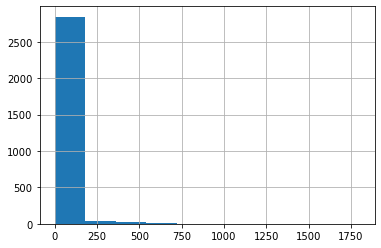

In [7]:
infantDeathsHistogram = df['infantDeaths'].hist(bins = 10)

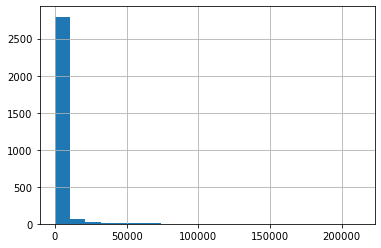

In [8]:
measlesHistogram = df['measles'].hist(bins = 20)

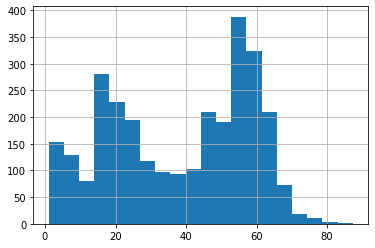

In [9]:
BMIHistogram = df['BMI'].hist(bins = 20)

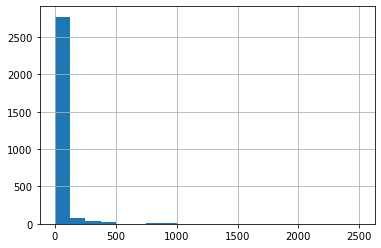

In [10]:
underFiveDeathsHistogram = df['underFiveDeaths'].hist(bins = 20)

From the above histograms, I have decided that since thee skew is very small for the infant deaths and under five deaths variables, I can remove the samples that are above 1000 and continue on with the analysis. Unfortunately, the distribution measles and BMI variables do not allow for the samples to be cut. Because of this, those variables will be removed. 

In [11]:
df = df[df.infantDeaths < 1000]
df = df[df.underFiveDeaths < 1000]

In [12]:
df.describe()

,year,lifeExpectancy,adultMortality,infantDeaths,alcohol,percentageExpenditure,hepatitisB,measles,BMI,underFiveDeaths,polio,totalExpenditure,diphtheria,HIV_AIDS,GDP,population,thinness_10_19,thinness_5-9,incomeCompositionOfResources,schooling
count,2922.000000,2912.000000,2912.000000,2922.000000,2729.000000,2922.000000,2373.000000,2922.000000,2888.000000,2922.000000,2903.000000,2697.000000,2903.000000,2922.000000,2474.000000,2.270000e+03,2888.000000,2888.000000,2755.000000,2759.000000
mean,2007.518823,69.245845,164.896635,22.986311,4.617486,742.111713,81.172777,2178.471937,38.451593,32.341205,82.621426,5.946974,82.408198,1.750240,7526.134950,9.872569e+06,4.716378,4.742486,0.628004,12.004458
std,4.613863,9.544872,124.459894,60.620051,4.058234,1992.664154,24.832093,10930.950732,20.021919,87.456561,23.460915,2.502455,23.715108,5.090477,14306.142199,2.618971e+07,4.109086,4.180315,0.211409,3.363982
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.860000,4.642980,77.000000,0.000000,19.500000,0.000000,78.000000,4.260000,78.000000,0.100000,464.195927,1.925278e+05,1.600000,1.500000,0.492000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.790000,66.212378,92.000000,16.000000,43.800000,4.000000,93.000000,5.780000,93.000000,0.100000,1793.782935,1.363050e+06,3.300000,3.300000,0.678000,12.400000
75%,2012.000000,75.700000,228.000000,21.000000,7.740000,444.950519,97.000000,342.750000,56.200000,26.000000,97.000000,7.500000,97.000000,0.800000,5955.138462,7.268290e+06,7.100000,7.100000,0.780000,14.300000
max,2015.000000,89.000000,723.000000,576.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,943.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,2.581621e+08,22.200000,22.600000,0.948000,20.700000


In [13]:
dfrows = len(df.axes[0])
dfcols = len(df.axes[1])
print("Number of rows: " + str(dfrows))
print("Number of columns: " + str(dfcols))

Number of rows: 2922
Number of columns: 22


After the removal of the infant deaths and under five deaths variables over 1000, one can see that the maximum values make much more sense than before.
16 rows were removed from the dataset. 

In [14]:
del df['BMI']
del df['measles']

Now that I know what each variable means, I can continue on with more in depth analyis.
Next, I will be viewing the frequency of the missing values within the dataset. 

In [15]:
nulltable = df.isnull().sum()
pd.set_option('display.max_rows', None)
print(nulltable)

country                           0
year                              0
status                            0
lifeExpectancy                   10
adultMortality                   10
infantDeaths                      0
alcohol                         193
percentageExpenditure             0
hepatitisB                      549
underFiveDeaths                   0
polio                            19
totalExpenditure                225
diphtheria                       19
HIV_AIDS                          0
GDP                             448
population                      652
thinness_10_19                   34
thinness_5-9                     34
incomeCompositionOfResources    167
schooling                       163
dtype: int64


While some of the variables have high zero/missing value counts, these variables still contain a lot of information. The only variables with missing values that I think could prove to be problematic are:
- Life Expectancy
- GDP

Since there are so many variables with missing values, I will be replacing these NaN variables using a forward fill method.
Following this, I will be making another null table to make sure that the code worked as expected. 

In [16]:
df = df.fillna(method='ffill')

In [17]:
afterFillNulltable = df.isnull().sum()
pd.set_option('display.max_rows', None)
print(afterFillNulltable)

country                         0
year                            0
status                          0
lifeExpectancy                  0
adultMortality                  0
infantDeaths                    0
alcohol                         0
percentageExpenditure           0
hepatitisB                      0
underFiveDeaths                 0
polio                           0
totalExpenditure                0
diphtheria                      0
HIV_AIDS                        0
GDP                             0
population                      0
thinness_10_19                  0
thinness_5-9                    0
incomeCompositionOfResources    0
schooling                       0
dtype: int64


Before I can continue on with the creation of the machine learning pipeline, I will look into the distribution of the target variable: life expectancy. 

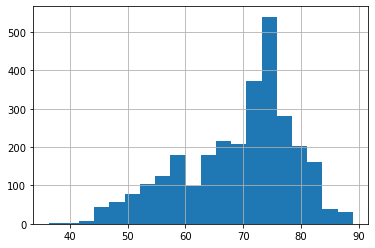

In [18]:
lifeExpectancyHistogram = df['lifeExpectancy'].hist(bins = 20)

From the above histogram, one can see that the distribution of the target variable, life expectancy, is left skewed. This is obviously a good thing as it means that people are living longer.

#### Step Three - Data Preparation

Next, I will be preprocessing the data and applying the KBest feature engineering method

I will be using this method to determine which features are most useful within our dataset. Before this algorithm can be used, the categorical variables (country, and country status) must be coded using the Label Encoder function within scikit learn.

In [19]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

I will begin by encoding the status variable.

In [20]:
df['status'].value_counts()
le.fit(df.status)
le.classes_
le.transform(df.status)
list(le.inverse_transform([0,1]))
df['statusLabeled'] = le.transform(df.status)

In [21]:
print ("The classes of the status variable are:", le.classes_)

The classes of the status variable are: ['Developed' 'Developing']


Now the country variable can be encoded.

In [22]:
df['country'].value_counts()
le.fit(df.country)
le.classes_
print("The classes of the country variable are:", le.classes_)

The classes of the country variable are: ['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 "Côte d'Ivoire" "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Iceland'
 'Indone

In [23]:
df['countryLabeled'] = le.transform(df.country)

In [24]:
df.describe()

,year,lifeExpectancy,adultMortality,infantDeaths,alcohol,percentageExpenditure,hepatitisB,underFiveDeaths,polio,totalExpenditure,diphtheria,HIV_AIDS,GDP,population,thinness_10_19,thinness_5-9,incomeCompositionOfResources,schooling,statusLabeled,countryLabeled
count,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2.922000e+03,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000
mean,2007.518823,69.216324,164.916496,22.986311,4.622211,742.111713,75.946270,32.341205,82.377139,5.913713,82.157426,1.750240,7511.939533,1.093298e+07,4.834702,4.876934,0.631866,11.946372,0.824778,94.606776
std,4.613863,9.557693,124.601557,60.620051,4.050296,1992.664154,28.634928,87.456561,23.670903,2.488732,23.917206,5.090477,13757.132416,2.848113e+07,4.246910,4.362383,0.211388,3.345093,0.380222,55.964908
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,63.000000,74.000000,0.000000,0.872500,4.642980,66.000000,0.000000,78.000000,4.260000,78.000000,0.100000,457.262368,1.357058e+05,1.600000,1.500000,0.494000,10.100000,1.000000,46.000000
50%,2008.000000,72.100000,144.000000,3.000000,3.795000,66.212378,89.000000,4.000000,93.000000,5.720000,93.000000,0.100000,1720.754637,1.273296e+06,3.400000,3.400000,0.686000,12.400000,1.000000,93.000000
75%,2012.000000,75.700000,228.000000,21.000000,7.680000,444.950519,96.000000,26.000000,97.000000,7.440000,97.000000,0.800000,6496.046947,7.235420e+06,7.200000,7.300000,0.791000,14.100000,1.000000,144.000000
max,2015.000000,89.000000,723.000000,576.000000,17.870000,19479.911610,99.000000,943.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,2.581621e+08,22.200000,22.600000,0.948000,20.700000,1.000000,191.000000


In [25]:
del df['country']
del df['status']

Next, I must assign input features to the varaibles X and y. 

In [26]:
X = df.iloc[:, df.columns != 'lifeExpectancy']

In [27]:
y = df['lifeExpectancy']

Before I can use the feature selection method, I must standardize the data. Standardizing the data allows for all possible variables to carry the same weight prior to feature selection. It is necessary to standardize the data in most datasets with a large number of variables that are not easily comparable. For lack of a better phrase, standardizing the data allows for each variable to have an "equal shot" at being included in the final model, and overall decreases bias.

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler = MinMaxScaler(feature_range = (0.1, 0.9))
X = scaler.fit_transform(X)

I will begin by using the SelectKBest filter method.

In [30]:
from sklearn.feature_selection import RFE, SelectKBest, chi2, f_classif, f_regression
import sklearn.feature_selection
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler

In [31]:
kBest = SelectKBest(score_func= f_regression,
                     k= 8
                    )

In [32]:
kBest = kBest.fit(X, y)
features = kBest.transform(X)

In [33]:
selectedFeatures = kBest.get_support()
print(selectedFeatures)

[False  True False False False False False False False  True  True False
 False  True  True  True  True  True False]


The result of the KBest feature selection algorithm are as follows:
- year F
- adult mortality T
- infant deaths F
- alcohol F
- percentage expenditure F
- hepatitis b F
- under five deaths F
- polio F
- total expenditure F
- diphtheria T
- hiv T
- gdp F
- population F
- thinness 10-19 T
- thinness 5-9 T
- income composition of resources T
- schooling T
- status labeled T
- country labeled F

Thus, the final eight selected features are:

- adult mortality
- diphtheria
- hiv
- thinness 10-19
- thinness 5-9
- income composition of resources
- schooling
- status labeled


In [34]:
dfFeatures = ["adultMortality", "diphtheria", "HIV_AIDS", 
            "thinness_10_19", "thinness_5-9", 
            "incomeCompositionOfResources", "schooling", 
            "statusLabeled"]

#### Step Four - Build the Model

In [35]:
import keras
from keras.models import Sequential
from keras.layers import Dense

First, the X and y variable must be specified using the features selected from the previous step.

In [36]:
X = df[dfFeatures]
y = df['lifeExpectancy']

In [37]:
X.shape

(2922, 8)

X will be standardized.

In [50]:
scaler = MinMaxScaler(feature_range = (0.1, 0.9))
X = scaler.fit_transform(X)

The Keras model building technique has a built in split function, however I will split the data myself in case it is needed. 

In [51]:
from sklearn.model_selection import train_test_split 
seed = 1234
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3 , 
                                                    random_state = seed,
                                                   )

Now the feed forward neural network will be created using the Keras package. 

In [52]:
ffnn_model = Sequential()
ffnn_model.add(Dense(12, activation='relu', input_shape=(X.shape[1],)))

In [53]:
ffnn_model.add(Dense(8, activation = 'relu'))

In [54]:
ffnn_model.add(Dense(5, activation = 'relu'))

In [55]:
ffnn_model.add(Dense(1, activation = 'sigmoid'))

In [56]:
optimizer = keras.optimizers.Adam(lr = 0.0001)

In [57]:
ffnn_model.compile(optimizer = optimizer,
                   loss = "mse", 
                   metrics =  "accuracy"   
                  )

In [58]:
ffnn_history = ffnn_model.fit(X, y, 
                              validation_split = 0.1,
                              epochs= 150,
                              batch_size= 10,
                             verbose = 0)

The effectiveness of the model will be tested using the loss and MSE information. 

In [59]:
trainMSE = ffnn_model.evaluate(X_train, y_train, verbose = 0)

In [60]:
testMSE = ffnn_model.evaluate(X_test, y_test, verbose = 0)

In [61]:
print("Train MSE: ", trainMSE)
from matplotlib import pyplot
print("Test MSE: ", testMSE)

Train MSE:  [4751.37890625, 0.0]
Test MSE:  [4729.4111328125, 0.0]


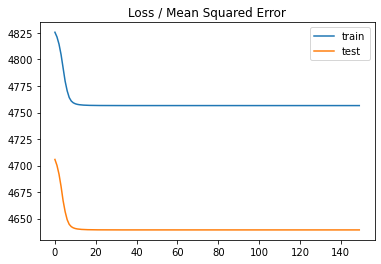

In [62]:
from matplotlib import pyplot
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(ffnn_history.history['loss'], label='train')
pyplot.plot(ffnn_history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

From this, we can see that there is something wrong with the model.

I will try the Keras algorithm a second time using the previously split data.

In [63]:
Newffnn_model = Sequential()
Newffnn_model.add(Dense(12, activation='relu', input_shape=(X.shape[1],)))
Newffnn_model.add(Dense(8, activation = 'relu'))
Newffnn_model.add(Dense(5, activation = 'relu'))
Newffnn_model.add(Dense(1, activation = 'sigmoid'))
optimizer = keras.optimizers.Adam(lr = 0.0001)
Newffnn_model.compile(optimizer = optimizer,
                   loss = "categorical_crossentropy", 
                   metrics =  "MSE"   
                  )
Newffnn_history = ffnn_model.fit(X_train, y_train, 
                              validation_data = (X_test, y_test),
                              epochs= 150,
                              batch_size= 10,
                             verbose = 0)
trainMSE = Newffnn_model.evaluate(X_train, y_train, verbose = 0)
testMSE = Newffnn_model.evaluate(X_test, y_test, verbose = 0)
print("Train MSE: ", trainMSE)
print("Test MSE: ", testMSE)

Train MSE:  [0.0, 4820.08984375]
Test MSE:  [0.0, 4797.97705078125]


In [64]:
Newhist = pd.DataFrame(Newffnn_history.history)
Newhist['epoch'] = Newffnn_history.epoch
Newhist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
145,4751.377930,0.0,4729.411133,0.0,145
146,4751.377930,0.0,4729.411133,0.0,146
147,4751.378418,0.0,4729.411133,0.0,147
148,4751.377930,0.0,4729.411133,0.0,148
149,4751.376953,0.0,4729.411133,0.0,149


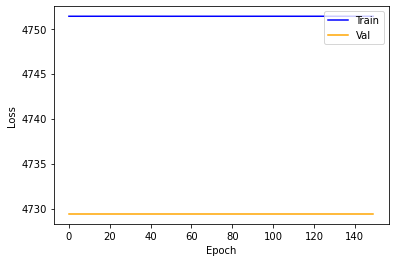

In [65]:
plt.plot(Newffnn_history.history['loss'], 'b', Newffnn_history.history['val_loss'], 'orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

Unfortunately, this appears to be just as bad as the previous alogorithm. 

Next, I will be using the random forest regressor function to see if that is a better fit for the data. 

In [66]:
from sklearn.ensemble import RandomForestRegressor

Create the classifier

In [67]:
rfRegressor = RandomForestRegressor(criterion= "mse" ,
                                    max_depth= 12,
                                    max_features= 8 ,
                                    min_samples_split= 50,
                                    n_estimators= 50,
                                    random_state= 7
                                    )

In [68]:
rfRegressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=12, max_features=8, min_samples_split=50,
                      n_estimators=50, random_state=7)

In [70]:
yPrediction = rfRegressor.predict(X_test)

Next, I will evaluate the accuracy of the random forest regressor. 

In [71]:
yPrediction = rfRegressor.predict(X_test)

In [72]:
from sklearn import metrics

In [73]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, yPrediction))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, yPrediction))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, yPrediction)))

Mean Absolute Error: 1.77269832679318
Mean Squared Error: 7.209358533332407
Root Mean Squared Error: 2.6850248664272005
